# Data Mining COVID-19-Project

### Introduction (only for reference purpose)

COVID-19 is a strain of coronavirus that first broke out in Wuhan, China in December 2019 and has since become a global pandemic

The White House Office of Science and Technology Policy (OSTP) pulled together a coalition research groups and companies  to prepare the COVID-19 Open Research Dataset (CORD-19) to attempt to address key open scientific questions on COVID-19.

This data-set is a resource of over 45,000 scholarly articles, including over 33,000 with full text, about COVID-19, SARSCoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in new coronavirus literature, making it difficult for the medical research community to keep up and extract insight
from this growing body work.

#### Possible research questions the data can give insights on
1.What is known about transmission, incubation, and environmental stability?<br>
(What do we know about natural history, transmission, and diagnostics for the virus? What have we learned about infection    prevention and control?)<br>                                                                                                2.What do we know about COVID-19 risk factors?                                                                      
3.What do we know about virus genetics, origin, and evolution?                                                            
(What do we know about the virus origin and management measures at the human-animal interface?) <br>                        4.What do we know about non-pharmaceutical interventions?
(What is known about equity and barriers to compliance for non-pharmaceutical interventions?)                               5.What do we know about vaccines and therapeutics?<br>                                                                      (What has been published concerning research and development and evaluation efforts of vaccines and therapeutics?)<br>      6.What do we know about diagnostics and surveillance?
What has been published concerning systematic, holistic approach to diagnostics (from the public health surveillance    perspective to being able to predict clinical outcomes)?

# Aim:.What are possible COVID-19 risk factors and their risk level with respect to COViD-19

## 1.Importing required libraries and methods

In [1061]:
#Importing necessary packages, functions 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from wordcloud import WordCloud
import re
from bs4 import BeautifulSoup
from sklearn.preprocessing import normalize

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import scipy.cluster.hierarchy as sch
try:
    from gensim.models import word2vec
except:

    from gensim.models import word2vec
nltk.download("stopwords")
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Begum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Data Cleaning

### Importing and cleaning data

Before performing any analyses, all text data must be cleaned and prepared for model usage. For this mini project,one set of  data is being used. The dataset is in metadata.csv  which includes 45000 scholarly articles out of which 33000 with full text. 

### 2.1 Importing Data Sets

a.First, covid-19 dataset(metadata.csv) is imported using the read_csv function from pandas.


In [1062]:
# complete overview of the data#
df = pd.read_csv('metadata.csv')
df.info(verbose=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45774 entries, 0 to 45773
Data columns (total 17 columns):
cord_uid                       45774 non-null object
sha                            31753 non-null object
source_x                       45774 non-null object
title                          45617 non-null object
doi                            42440 non-null object
pmcid                          26243 non-null object
pubmed_id                      34641 non-null float64
license                        45774 non-null object
abstract                       37913 non-null object
publish_time                   45765 non-null object
authors                        43774 non-null object
journal                        41707 non-null object
Microsoft Academic Paper ID    964 non-null float64
WHO #Covidence                 1768 non-null object
has_full_text                  45774 non-null bool
full_text_file                 35558 non-null object
url                            45472 non-null 

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389


In [1063]:
#Importing dataset with required features
df=pd.read_csv('metadata.csv', usecols=['title','abstract','authors','publish_time'])

In [1064]:
# Previewing the  dataset.
df.head()

,title,abstract,publish_time,authors
0,SIANN: Strain Identification by Alignment to N...,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...
1,Spatial epidemiology of networked metapopulati...,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li
2,Sequencing of the human IG light chain loci fr...,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...
3,Bayesian mixture analysis for metagenomic comm...,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol
4,Mapping a viral phylogeny onto outbreak trees ...,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen


In [1065]:
#understanding dimensions#
df.shape

(45774, 4)

b.From the above 5 rows we can observe some data cleaning requirements.                                                 

In [1066]:
#check for nan values
df.isnull().sum()

title            157
abstract        7861
publish_time       9
authors         2000
dtype: int64

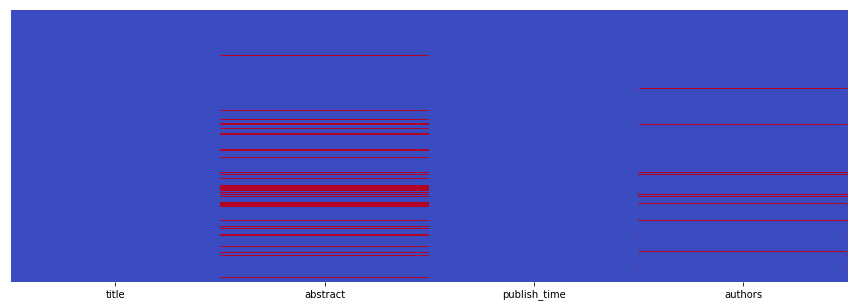

In [1067]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

c.Dropping values that are missing to ease the analysis processs

In [1068]:
#drop missing values
df = df.dropna()

In [1069]:
df.isnull().sum()

title           0
abstract        0
publish_time    0
authors         0
dtype: int64

d.Dropping if any duplicates are in the data

In [1070]:
df = df.drop_duplicates(subset='abstract', keep="first")

In [1071]:
#final sahpe of the dataframe
df.shape

(37252, 4)

In [1072]:
df=df.reset_index()

e.Check the length of the text in abstract to understand if enough information is available

In [1073]:
df['pre_clean_len'] = [len(str(t)) for t in df.abstract]

In [1074]:
df.head()

,index,title,abstract,publish_time,authors,pre_clean_len
0,0,SIANN: Strain Identification by Alignment to N...,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,1221
1,1,Spatial epidemiology of networked metapopulati...,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,993
2,2,Sequencing of the human IG light chain loci fr...,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,1313
3,3,Bayesian mixture analysis for metagenomic comm...,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,1593
4,4,Mapping a viral phylogeny onto outbreak trees ...,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,1584


### 2.2 Cleaning  dataframe

#### 2..1 Converting all text to lower case

In [1075]:
#### Function to convert letters of abstract to lowercase
def lower_fn(text):
    lower_case = str(text).lower()
    lower_case=lower_case.replace('abstract', '')
    return(lower_case)

In [1076]:
#converting all letter to lowercase for abstract
df['lower']=df['abstract'].apply(lower_fn)

In [1077]:
df.head()

,index,title,abstract,publish_time,authors,pre_clean_len,lower
0,0,SIANN: Strain Identification by Alignment to N...,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,1221,next-generation sequencing is increasingly bei...
1,1,Spatial epidemiology of networked metapopulati...,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,993,an emerging disease is one infectious epidemic...
2,2,Sequencing of the human IG light chain loci fr...,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,1313,germline variation at immunoglobulin gene (ig)...
3,3,Bayesian mixture analysis for metagenomic comm...,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,1593,deep sequencing of clinical samples is now an ...
4,4,Mapping a viral phylogeny onto outbreak trees ...,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,1584,developing methods to reconstruct transmission...


#### 2.2 Splitting sentences into words using tokenizer (method tokenize)

In [1078]:
# Function for Splitting sentences into words using tokens
def word_split(clean_html):
        tokenizer = RegexpTokenizer(r'\w+')         
        b = tokenizer.tokenize(clean_html)
        return(b)

In [1079]:
df['token_words']=df['lower'].apply(word_split)

In [1080]:
df['token_words'].head(1)

0    [next, generation, sequencing, is, increasingl...
Name: token_words, dtype: object

#### 2.3 Removing stop words and some words that are not required

In [1081]:
# Function to removing stop words using the  set(stop_words1 from nltk)
stop_words1=set(stopwords.words('english'))
list=['abstract','found','method','well']
stop_words2=set(list)
def words_stop(token_words):
        clean_stop = [word for word in token_words if word not in stop_words1]#removing words not in english
        clean_stop = [word for word in clean_stop if word not in stop_words2]#removing words abstract
        return(clean_stop)

In [1082]:
df['clean_stop']=df['token_words'].apply(words_stop)

# 3. Exploratory Analysis

#### 3.1 Research papers vs published year

In [1083]:
pb1=df[(df['publish_time']>='1970') &(df['publish_time']<='1980')]
pb2=df[(df['publish_time']>='1981') &(df['publish_time']<='1990')]
pb3=df[(df['publish_time']>='1991') &(df['publish_time']<='2000')]
pb4=df[(df['publish_time']>='2001') &(df['publish_time']<='2010')]
pb5=df[(df['publish_time']>='2011') &(df['publish_time']<='2020')]

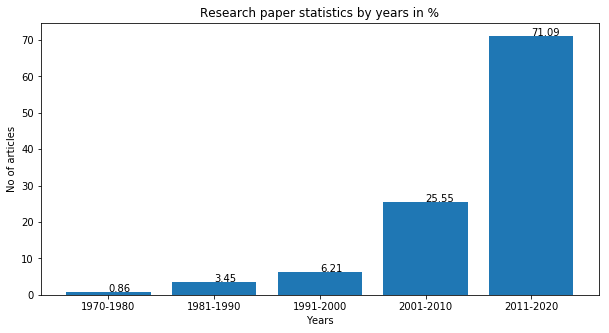

In [1084]:
 fig,ax1=plt.subplots(1,1,figsize=(10,5))
years=['1970-1980','1981-1990','1991-2000','2001-2010','2011-2020']
data=[round(len(pb1)/30853*100,2),round(len(pb2)/30853*100,2),round(len(pb3)/30853*100,2),round(len(pb4)/30853*100,2),round(len(pb5)/30853*100,2)]
ax1.bar(years,data)
ax1.set_title('Research paper statistics by years in %')
ax1.set(xlabel='Years', ylabel='No of articles')
for i in range(len(data)):
       ax1.annotate(str(data[i]), xy=(years[i],data[i]))

It is an important visualization that tells us that most of the papers (71.09%) are from recent years between (2011-2020).<br>
It is also significant that almost 95% of papers are of recent 20 years.

#### 3.2 Searching for papers that are only on COVID-19

In [984]:
covid_list=['covid-19','covid','cov','coronavirus','sars','cov-2','corona','2019',' Orthocoronavirinae','coronaviridae','hcov']

In [985]:
def covid(x):
    list=[]
    for word in covid_list:
        if word in x:
            list.append(word)
            return(list)
            

In [986]:
df['boolean']=df['clean_stop'].apply(covid)

In [987]:
sum1=df['boolean'].isnull().sum()
sum2=34809-sum1
sum=[sum1,sum2]

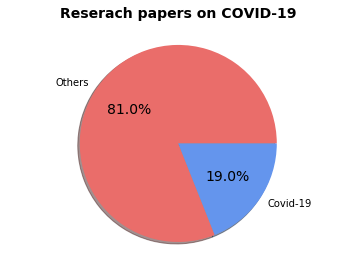

In [988]:
# Pie chart.
paper_titles = ['Others','Covid-19']
col = ['#EA6D6A', '#6495ED']
patch, text, auto = plt.pie(sum, labels = paper_titles, colors = col, shadow = True, autopct = '%1.1f%%')
plt.title('Reserach papers on COVID-19', fontsize = 14, fontweight = 'bold', y = 1.05)
for i in range(0, len(auto)): auto[i].set_fontsize(14)

plt.axis('equal')
plt.show()

The covid-19 started in 2019 November that is depicted truly from the plot that less papers are related with covid-19,as much of that research is not yet generated.
This also gives an understanding that any insights that are made from the data is mostly based on the viruses that are previous pandemics related, so risk factors obtained from this data may be just approximations to the actual factors of COVID-19

#### 3.4 Word cloud to explore posiible risk factors from the cleaned abstract

In [1085]:
word_cloud=[]# getting all words from abstract stored in column clean_stop

for i in df.index:
            b=df['clean_stop'][i]
            for word in b:
                 word_cloud.append(word)
           
           

In [1086]:
word_cloud_list=pd.Series(word_cloud).str.cat(sep=' ')

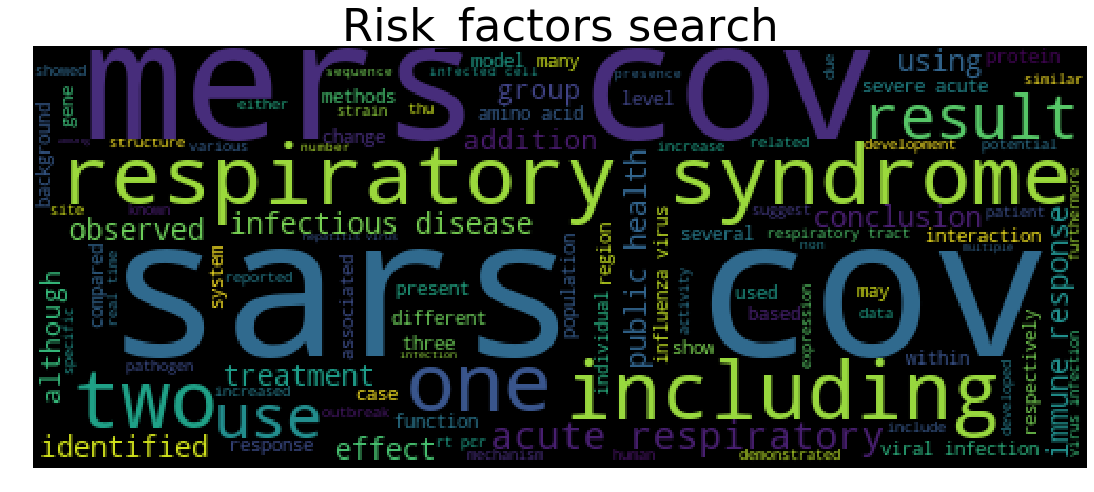

In [1090]:
wordcloud = WordCloud(width = 500, height = 200,background_color ='black',min_font_size = 5).generate(word_cloud_list) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Risk_factors search',{'fontsize':45})  
plt.show()

This exploratory analysis give us a complete visualization of words/features that are  most frequent  symptoms of covid-19.Therefore I decided to use the keyword extraction method to get specific risk_factors from the cleaned abstract.

# 4.Model Preparation

#### 4.1 Finding possible risk factors of COVID-19

In [926]:
from IPython.display import Image
Image(url='https://www.canada.ca/content/dam/phac-aspc/images/services/publications/diseases-conditions/people-high-risk-for-severe-illness-covid-19/coronavirus-factsheet-people-at-high-risk-en-cover.jpg',width=1000, height=20)


#### 4.2 Feature Engineering(using keyword extraction)

In [997]:
factors=['older','asthma','copd','hepatitis','diabetes','chemotherapy','pregnant','smoking','cancer','hiv','immunocompromised','dialysis']

{'older': 0, 'asthma': 0, 'copd': 0, 'hepatitis': 0, 'diabetes': 0, 'chemotherapy': 0, 'pregnant': 0, 'smoking': 0, 'cancer': 0, 'hiv': 0, 'immunocompromised': 0, 'dialysis': 0}
{'older': 538, 'asthma': 446, 'copd': 171, 'hepatitis': 1993, 'diabetes': 298, 'chemotherapy': 112, 'pregnant': 260, 'smoking': 119, 'cancer': 963, 'hiv': 1255, 'immunocompromised': 307, 'dialysis': 43}


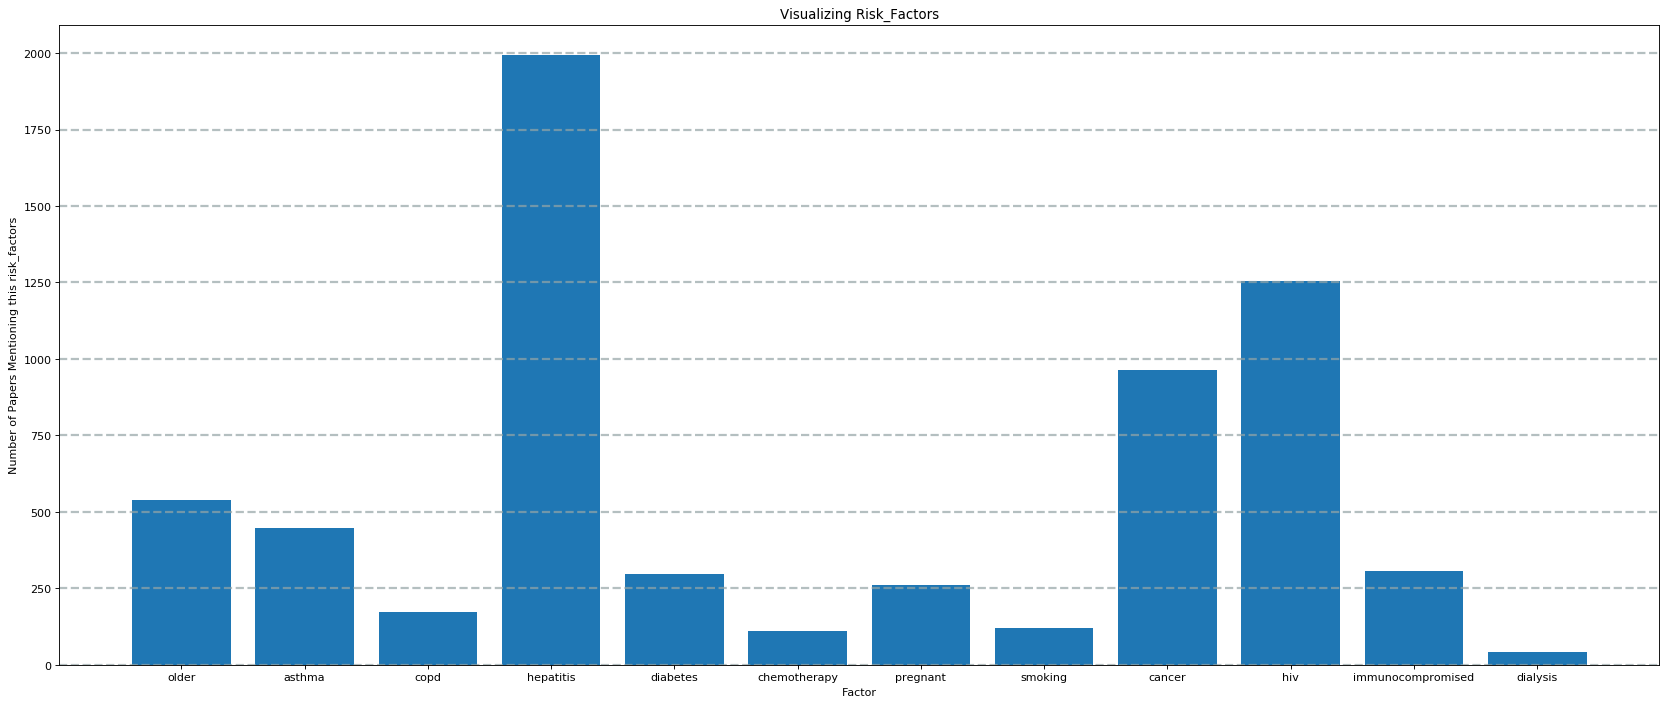

In [998]:
#Lets do some preliminary exploratory data analysis

factor_count = dict((factor,0) for factor in factors)

print(factor_count)

for factor in factor_count:
    for abstract in df['clean_stop']:
        if str(factor) in abstract:
            factor_count[factor] += 1


print(factor_count)

loc = np.arange(len(factor_count))
width = 0.35

fig = plt.figure(num=None, constrained_layout=True, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(factor_count.keys(),factor_count.values())
ax.set_xticks(loc, tuple(factors))

ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this risk_factors')
ax.set_xlabel('Factor')
ax.set_title('Visualizing Risk_Factors')
plt.show()


It is observed that Cancer,Hepatitis and HIV are the most important risk factors

In [999]:
#Function for searchin risk factors
def search_factors(x):
             list=[]
    # x=highlevel_df.clean4[0]
             for s in factors:
                         if s in x:
                                          
                                list.append(s)         
             return(list)
                   

In [1000]:
df['factors']=df['clean_stop'].apply(search_factors)

#### 4.3 Stemming the words

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.

1.Stemming:
"Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language."& computer program stems word may be called a stemming program, stemming algorithm, or stemmer.
Stemming Algorithms:(I use gutenberg corpora for stemming)(faster)
PorterStammer or LancasterStammer:PorterStemmer uses Suffix Stripping(Removing suffixes from a word) to produce stems
Porter Stemmer.PorterStemmer algorithm does not follow linguistics rather a set of 05 rules for different cases that are applied in (step by step) to generate stems.
LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur. Over-stemming causes the stems to be not linguistic, or they may have no meaning.

2.Lematization:(wordnet corporus and stop word corporus is needed.(slower) Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma is the canonical form, dictionary form, or citation form of a set of words.

In [1002]:

def stemmer(clean_words):#to join words
          stem_sentence=[]
          for word in clean_words:
                stem_sentence.append(word)
                stem_sentence.append(" ")
          return "".join(stem_sentence)

In [1003]:
df['cleaned_text']=df['factors'].apply(stemmer)

In [1036]:
df['cleaned_text'].unique()

array(['', 'asthma ', 'hepatitis ', 'pregnant ',
       'hepatitis diabetes smoking hiv ', 'cancer ', 'older ', 'hiv ',
       'smoking ', 'diabetes ', 'copd diabetes ', 'older diabetes ',
       'chemotherapy cancer ', 'dialysis ',
       'copd hepatitis diabetes smoking ', 'older diabetes cancer ',
       'older smoking ', 'asthma diabetes smoking ', 'hepatitis hiv ',
       'older copd ', 'copd diabetes smoking ',
       'older chemotherapy cancer ', 'copd smoking ', 'older asthma ',
       'older hiv ', 'immunocompromised ', 'copd ',
       'asthma copd diabetes ', 'diabetes hiv ', 'chemotherapy ',
       'older smoking cancer ', 'diabetes cancer hiv ',
       'hiv immunocompromised ', 'smoking hiv ', 'asthma copd ',
       'cancer hiv ', 'diabetes cancer ', 'hepatitis cancer ',
       'hepatitis immunocompromised ', 'diabetes chemotherapy ',
       'asthma cancer ', 'asthma smoking ', 'cancer immunocompromised ',
       'older immunocompromised ', 'cancer hiv immunocompromised ',


# 5.Model Selection and fitting to data

#### 5.1 Feature Extraction-Text


A problem with modeling text is that it is messy, and techniques like machine learning algorithms prefer well defined fixed-length inputs and outputs.
Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.

In language processing, the vectors x are derived from textual data, in order to reflect various linguistic properties of the text.This is called feature extraction or feature encoding.

Models for Feature Extraction:
1.Word Frequency<br>
2.TF-IDF



#### 5.1.1 Bag of words Model


A popular and simple method of feature extraction with text data is called the bag-of-words model of text.
Bag of Words is a word frequency algorithm that counts how many times a word appears in a document. We can use this counts to implement a model in textual analysis of any documents like news articles.

In [1005]:
#Bag of words (from sklearn.feature_extraction.text import CountVectorizer)
#Bag of words (from sklearn.feature_extraction.text import CountVectorizer)
def bag(X):
    vectorizer1 = CountVectorizer(max_features =5000)
    X1 = vectorizer1.fit_transform(X)
    X1_n = normalize(X1)#normalize the obtained feature vectors(features are skills)
    z1=pd.DataFrame(X1.toarray(), columns=vectorizer1.get_feature_names())
    return(X1_n,z1)

In [1038]:
X_fdata1=df['cleaned_text']
Xh1,zh1=bag(X_fdata1)
zh1.head()

,asthma,cancer,chemotherapy,copd,diabetes,dialysis,hepatitis,hiv,immunocompromised,older,pregnant,smoking
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


#### 5.1.2 TF-IDF


A problem with scoring word frequency is that highly frequent words start to dominate in the document (e.g. larger score), but may not contain as much “informational content” to the model as rarer but perhaps domain specific words.

One approach is to rescale the frequency of words by how often they appear in all documents, so that the scores for frequent words like “the” that are also frequent across all documents are penalized.

This approach to scoring is called Term Frequency – Inverse Document Frequency, or TF-IDF where:

Term Frequency: is a scoring of the frequency of the word in the current document.
Inverse Document Frequency: is a scoring of how rare the word is across documents.
The scores are a weighting where not all words are equally as important or interesting.
The scores have the effect of highlighting words that are distinct (contain useful information) in a given document.



In [1009]:
#TF-IDF(from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf(X):
    vectorizer2 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=5000)
    X2 = vectorizer2.fit_transform(X)
    X2_n = normalize(X2)
    z2=pd.DataFrame(X2.toarray(), columns=vectorizer2.get_feature_names())
    return(X2_n,z2)

In [1037]:
#TF-IDF
Xh2,zh2=tfidf(X_fdata1)
zh2.head()

,asthma,cancer,chemotherapy,copd,diabetes,dialysis,hepatitis,hiv,immunocompromised,older,pregnant,smoking
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 5.1.3 Neural Methods 


1.Word2Vec is the first neural embedding model<br>
a.One-word context<br>
c.Skip-gram model<br>
2.GloVe (Glove: Global Vectors for Word Representation)<br>
3.FastText (Enriching Word Vectors with Subword Information)<br>
4.Poincaré embeddings (Poincaré Embeddings for Learning Hierarchical Representations)<br>

#### Method used: Word2Vec

In [1011]:
#word2vec generates vector for each word. 
#Hence we avgerage the vectors of all words in a sentance to 1 vector that represents entire sentance

def buildWordVector(text, size):
    
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    if text=='':
        vec=vec
    else:
        text = text.split(' ')
        text=text[:-1]
       
        for word in text:
            
           
            vec += model[word].reshape((1, size))
            count += 1.
        if count != 0:
            vec /= count
            
    return vec

In [1012]:
# we need to pass splitted sentences to the model
tokenized_sentences = [sentence.split() for sentence in df['cleaned_text']]
model = word2vec.Word2Vec(tokenized_sentences,size=100, min_count=1)
#applying word2vec for generic tweets data set
X4 = np.concatenate([buildWordVector(z, 100) for z in df['cleaned_text']])

In [1059]:
zh3=pd.DataFrame(X4)
zh3.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


#### 5.1.4 Okapi BM25

BM25 is a bag-of-words retrieval function that ranks a set of documents based on the query terms appearing in each document, regardless of their proximity within the document.

In [1014]:
!pip install rank_bm25

In [1019]:
from rank_bm25 import BM25Okapi



corpus =factors

bm25 = BM25Okapi(corpus)
# <rank_bm25.BM25Okapi at 0x1047881d0>

In [1020]:

def bm(x):
    tokenized_query=x
    doc_scores = bm25.get_scores(tokenized_query)
   
    
    return(doc_scores)

In [1021]:
Xbm =[bm(z) for z in df['factors']]

In [1022]:
bm25.get_top_n(tokenized_query,corpus, n=10)



['dialysis',
 'immunocompromised',
 'hiv',
 'cancer',
 'smoking',
 'pregnant',
 'chemotherapy',
 'diabetes',
 'hepatitis',
 'copd']

In [1042]:
zh4=pd.DataFrame(Xbm)
zh4.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Results

Only top 10 are considered in the analysis and asthma is excluded because it is similar to COPD. and we can see from bm25 model the listed top 10 risk factors


From the obtained matrices of the 4 models we analysed the values that support the hierarchial clustering are from two model so implementing them.

#### 6.1 Hierarchial Clustering of  Risk Factors-(model-1)-Bag of words

In [1055]:
def hc(x):
#OUTPUT# 
            df_final1 =x
            # get the list of Fcator names
            factors_list = df_final1.columns.values
            df_final2=df_final1
            for i in df_final2.columns:
                df_final2[i] = df_final1[i].apply(lambda x: 1 if (x !=0) else x)
            for i in df_final2.columns:
                df_final2[i] = df_final1[i].apply(lambda x: 10 if x ==0 else x)
            for i in df_final2.columns:
                df_final2[i] = df_final1[i].apply(lambda x: 0 if x ==1 else x)
            for i in df_final2.columns:
                df_final2[i] = df_final1[i].apply(lambda x: 1 if x ==10 else x)
            df4=np.sum(df_final2,axis=0)
            df4=df4.sort_values()
            dff=pd.DataFrame(df4)
            dff.columns=["count"]
            dff.sort_values(by="count")
            from scipy import zeros as sci_zeros
            # empty matrix is fill
            D = sci_zeros([dff.size,dff.size])

            # Find all element wise temp differences
            for i in range(dff.size):
                for j in range(dff.size):
                    D[i,j] = abs(np.array(dff)[i]-np.array(dff)[j])
                    #Hierarchical Clustering
            title = 'Risk_factors Clustering'
            fig_height=12
            label_size=14
            Y = sch.linkage(D, method='ward')
            l=dff.index

            fig = plt.figure(figsize=(20,fig_height))
            ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

            Z1 = sch.dendrogram(Y, orientation='right', truncate_mode='lastp',p=15,color_threshold=80)
            labels = l

            ax1.set_xticks([])
            ax1.set_yticklabels(labels, fontsize=label_size)

            ax1.set_title(title)
            # ax1.axis('off')
            plt.axvline(x=200, color='r', linestyle='--')

            plt.show() # supress prints
            return()

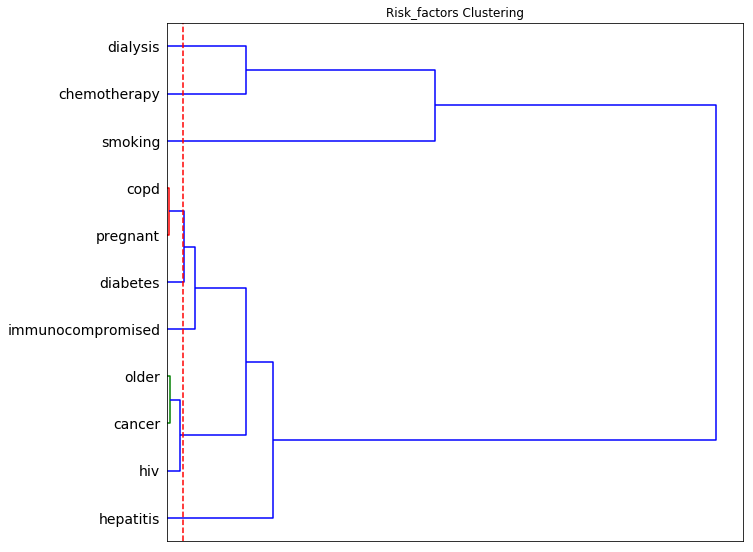

()

In [1056]:
hc(zh1.iloc[:, 1:])

It is observed that clusters that are formed in this is
Are not coherent and cannot be used as cluster groups as they are based on occurrences 
so no relation ship is formed


#### 6.2 Hierarchial Clustering of  Risk Factors-(model-2)-TF-IDF

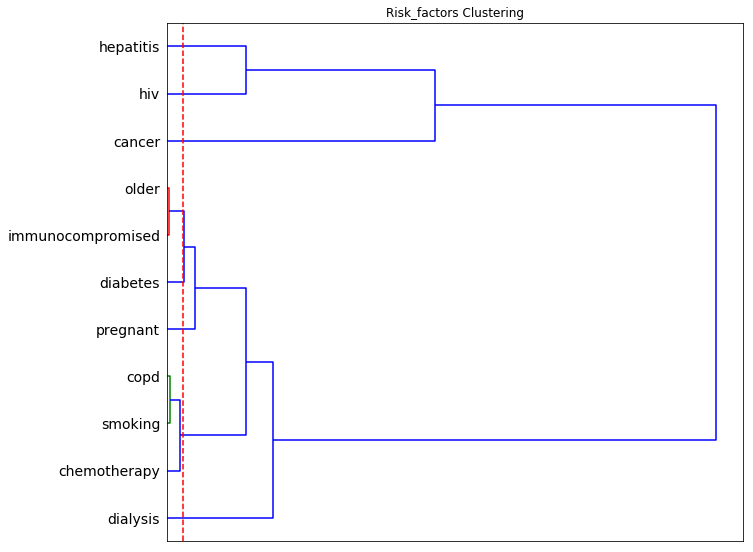

()

In [1057]:
hc(zh2.iloc[:, 1:])

# 7. Model Insights

The model with TF-IDF gives us a better clustering results from which we can have some insights about the risk Factors of COVID-19.<br>
The most significant risk_factors that are severe for COVID-19 patients are chronic diseases like HIV ,Hepatitis and        cancer.<br> 

HIV (human immunodeficiency virus) is a virus that attacks the immune system, the body's natural defence system. Without a  strong immune system, the body has trouble fighting off disease. Both the virus and the infection it causes are called HIV.<br> 

Hepatitis refers to an inflammatory condition of the liver. It's commonly caused by a viral infection, but there are other  possible causes of hepatitis. These include autoimmune hepatitis and hepatitis that occurs as a secondary result of          medications, drugs, toxins, and alcohol.<br>

Cancer is a group of diseases involving abnormal cell growth with the potential to invade or spread to other parts of the body.<br>




The second group of chronic diseases that make COVID-19 patients more severe older adults and immunocompromised.
Patients who are immunocompromised have a reduced ability to fight infections and other diseases. This may be caused by certain diseases or conditions, such as AIDS, cancer, diabetes. It may also be caused by certain medicines or treatments, such as anticancer drugs, chemotherapy. Also called immunosuppressed.<br>
The patients which are older adults mostly have less immunity beacuse of many health conditions and other diseases.


The third important group that are risk factors are COPD and smoking these are both realted to persons respiratory system.
Chronic obstructive pulmonary disease (COPD) is a type of obstructive lung disease characterized by long-term breathing problems and poor airflow.<br>
Smoking also lowers the response to some medication and contributes to chronic diseases such as ischaemic heart disease and hypertension.<br>
Diabetes also is clustered with older adults because risk of type 2 diabetes increases as we get older, especially after    age 45. That is probably because people tend to exercise less, lose muscle mass and gain weight as they age.               
Pregnant women can be immunosuppressd and can get diabetes but older adults is not related in this cluster.                

The fourth important group is chemotherapy and dialysis which are both treatments performed when people have chronic diseases related to  cancer and liver disease.Therefor this cluster is connected to first cluster with cancer.

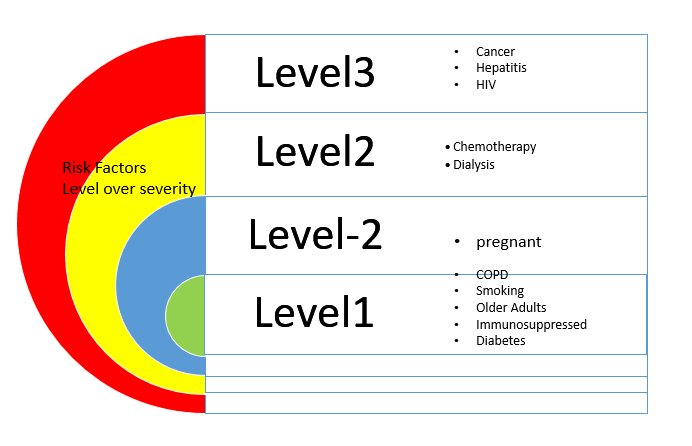

# 7. Recommendations

In [1]:
import webbrowser
webbrowser.open('https://globalnews.ca/news/6747664/coronavirus-age-risk-disease-severity-covid/', new=2)


True

From the above news report our analysis is verified and it is recommended to take measures and look for patients medical history when they
come for tests for COVID-19.Based on the risk fcatores they should be evaluation giving them the chance of severity in their cases,
Using this list the patients who are having diseases like cancer,hepatitis and HIV should be advised to take extra measures durin their isolation period 
and also in the mean time their results arrive.

This assessment done during the testing will also be helpul for the health care systems to predict an average number of 
health care demanded in future if those patients get sick.
These patients if are treated properly ,early based on their severity may help flatten the curve, as in Italy only 2% of people who died
had no ailments rest had one or more chronic diseases.
In statistics Italy is not a small sample and has high number contribution to deaths so can reflect for the whole population.